In [ ]:
!pip install control
import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 9.8 MB/s eta 0:00:00


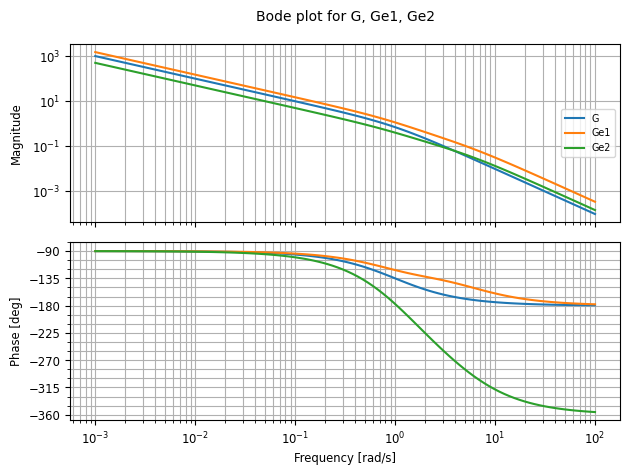

In [ ]:
import numpy as np
w = np.logspace(-3,2,100)

# Planta nominal
s = ctrl.tf('s')
G = 1/((s+1)*s)
G.name = 'G'

# Incertidumbre
W = 2.5 * (s+1)/(s+5)
W.name = 'W'

Ge1 = G*(1+W)
Ge1.name = 'Ge1'
Ge2 = G*(1-W)
Ge2.name = 'Ge2'
ctrl.bode([G,Ge1,Ge2],w)



<TransferFunction>: T
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      s + 1.1
  ---------------
  s^2 + 2 s + 1.1


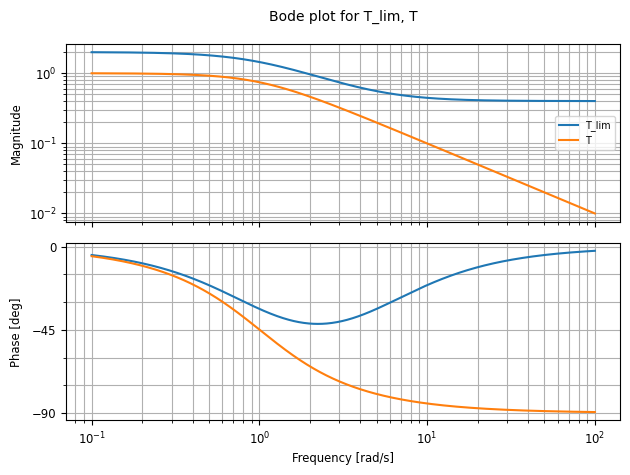

In [ ]:
# diseño T

T_lim = 1/W
T_lim.name = 'T_lim'

C = 0.1
C = (s+1.1)
#C.name = 'C'

T = ctrl.feedback(C*G,1,name='T')
print(T)
ctrl.bode([T_lim,T])

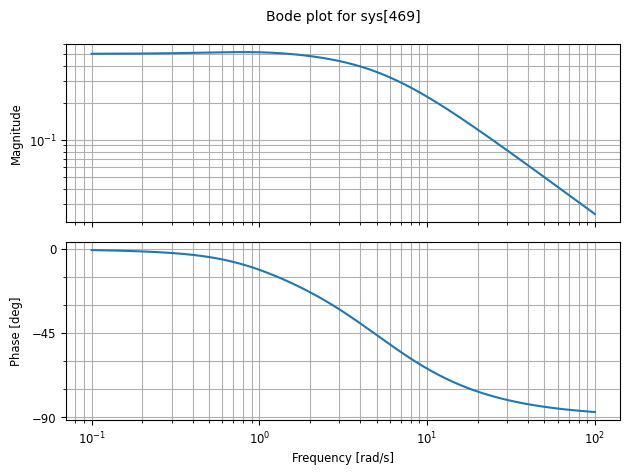

In [ ]:
# Verifico la condicion de estabilidad robustaPor favor realizar la entrega en el siguiente transporte
ctrl.bode(T*W)

[-7.45538045+0.j         -1.02230978+0.24792355j -1.02230978-0.24792355j]
[-2.72200194+0.j         -0.88899903+0.46900593j -0.88899903-0.46900593j]


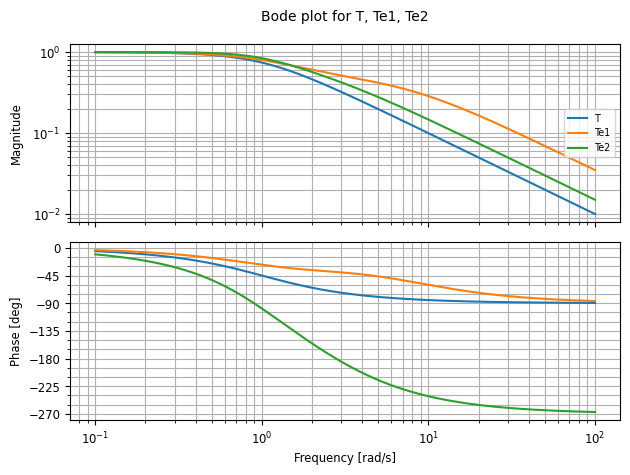

In [ ]:
# Veamos los bodes de LC para los modelos extremos

Te1 = ctrl.feedback(C*Ge1,1,name='Te1')
print(ctrl.poles(Te1))

Te2 = ctrl.feedback(C*Ge2,1,name='Te2')
print(ctrl.poles(Te2))

ctrl.bode([T,Te1,Te2])



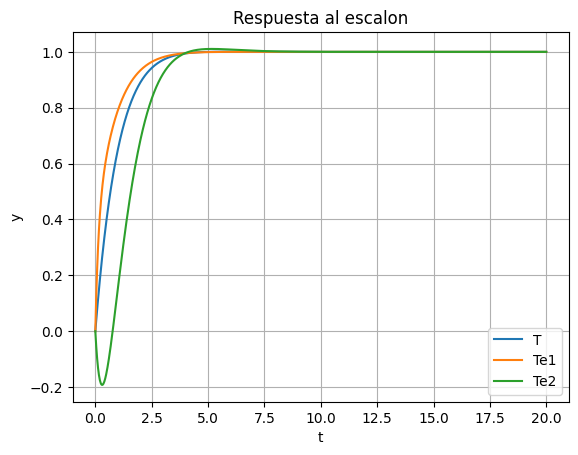

In [ ]:
from matplotlib import pyplot as plt

t = np.linspace(0,20,1000)
TT = [T,Te1,Te2]

for Te in TT:
  t,y = ctrl.step_response(Te,t)
  plt.plot(t,y,label=Te.name)

plt.xlabel('t')
plt.ylabel('y')
plt.title('Respuesta al escalon')
plt.grid()
plt.legend()
plt.show()



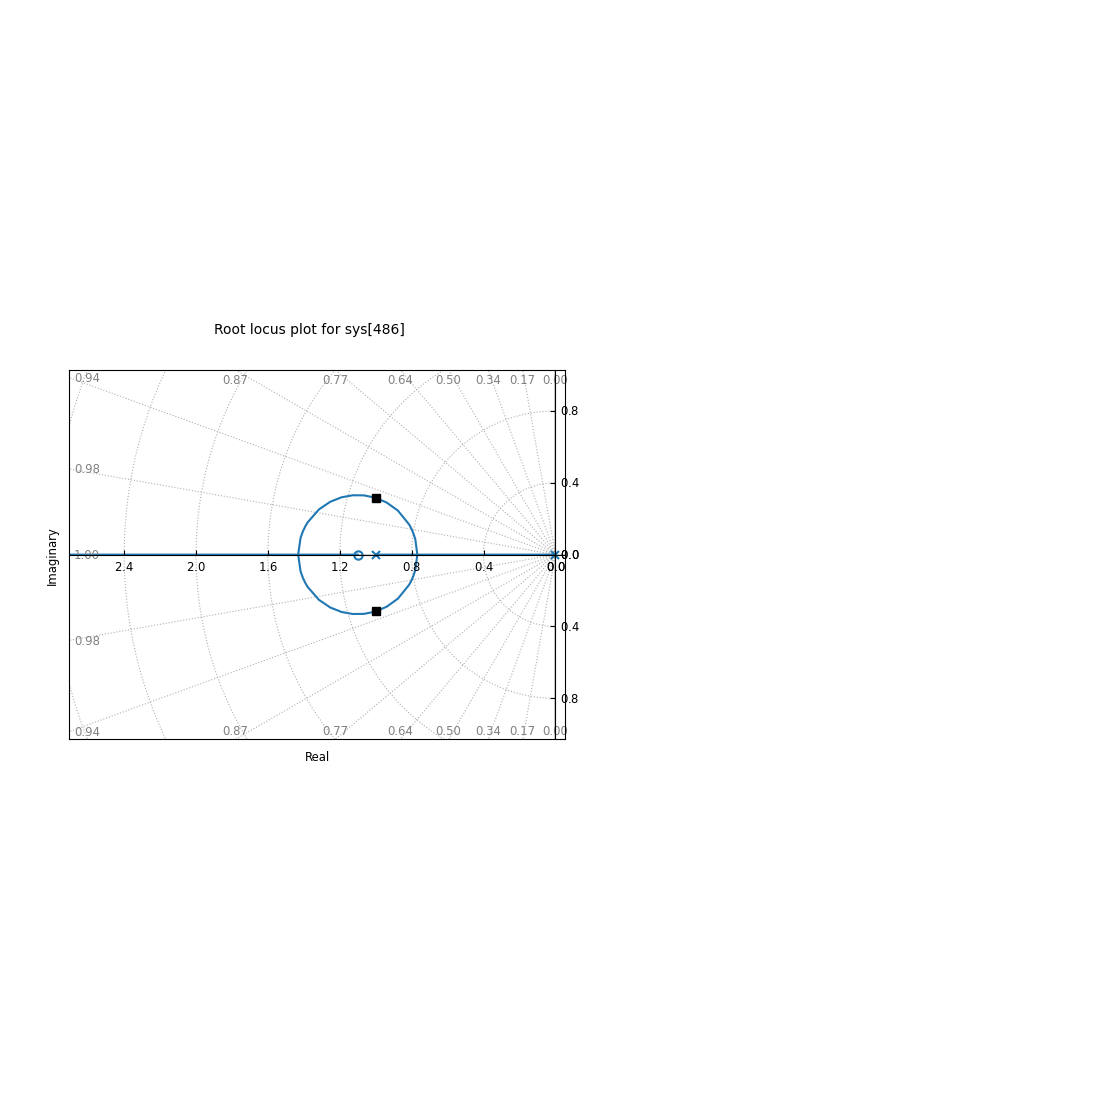

In [ ]:
# y el rlocus
ctrl.rlocus(C*G,initial_gain=1)


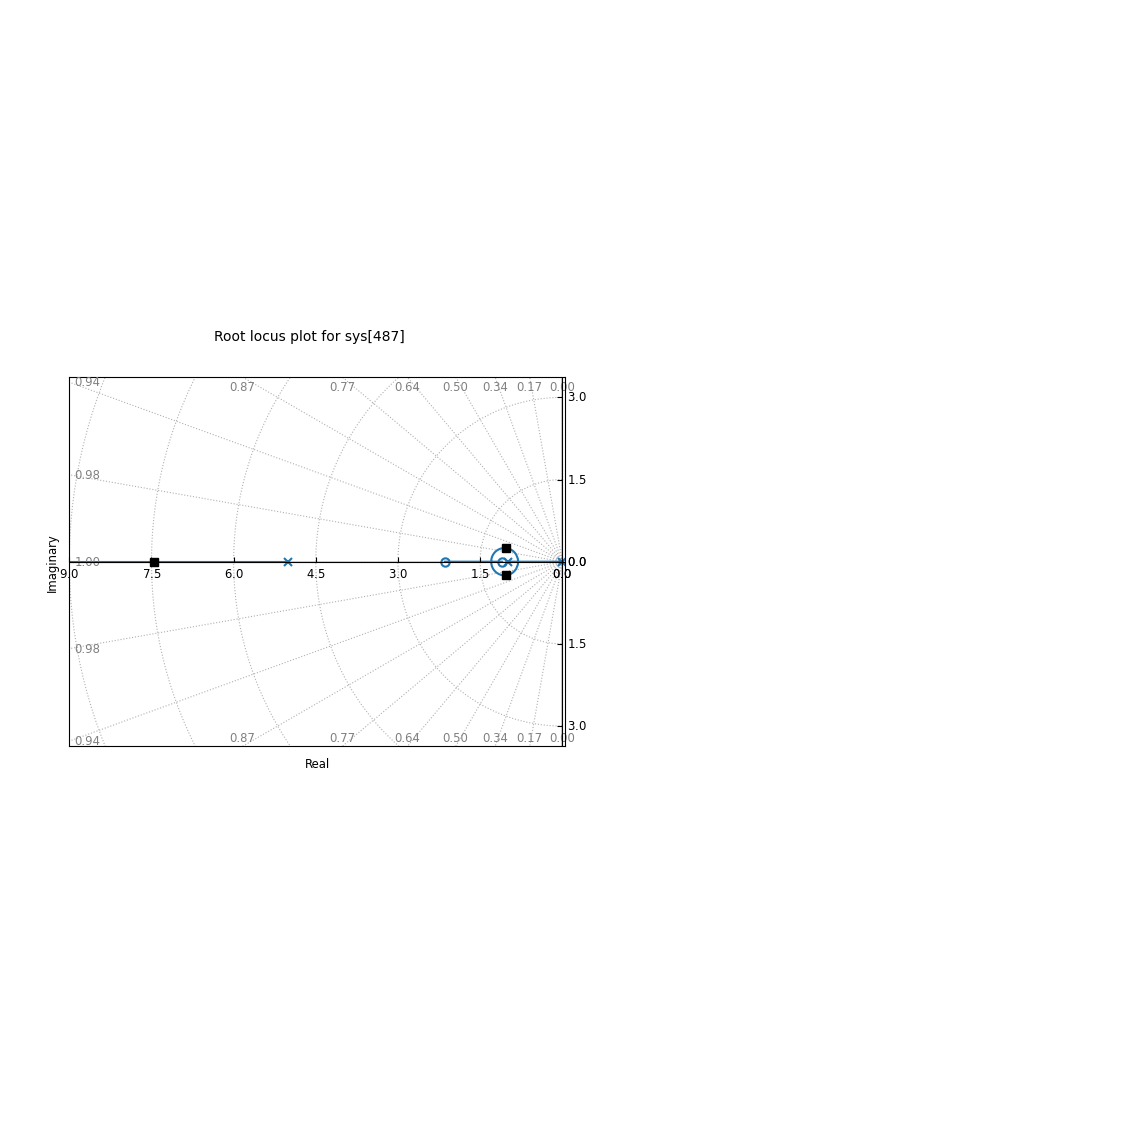

In [ ]:
ctrl.rlocus(C*Ge1,initial_gain=1)


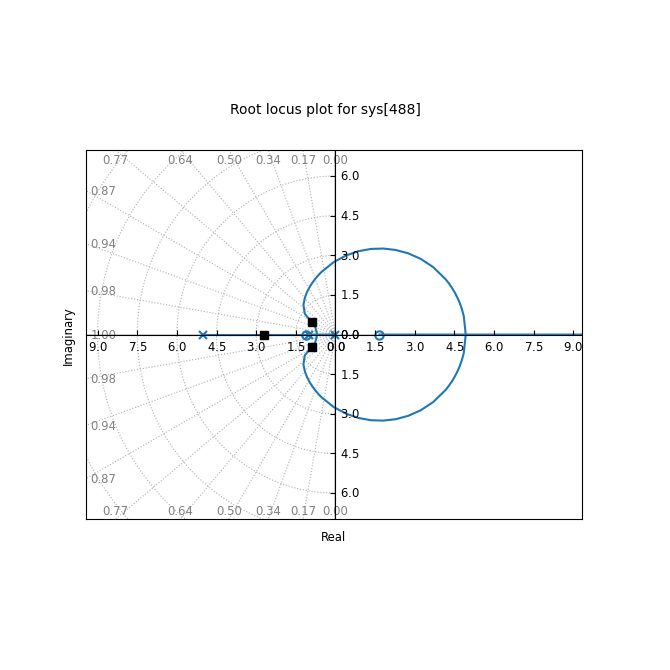

In [ ]:
ctrl.rlocus(C*Ge2,initial_gain=1)
